# 3 - Identification of Variation and Causal Diagram



---
**Outline**

1. Review
2. Session 1: Identification of Variation
   - Brown Hair
   - Avocado
3. Session 2: Causal Diagram
   - IP spend on Profit
   - Police per Capita
   - Online Class

---
## Identification of Variation

- What we see in the data through descriptive analysis such as correaltion merely is relationship, but to know why two variables are related lead to causal question
- From what we observed in the data, we aim to look for variation that answer causal question
- Two key ideas : looking for variation and identification.
- Looking for Variation: Identifying specific differences within the data that are relevant to the research question. Example : Variation in income by hair color just among college students.
- Identification: Recognizing and addressing potential issues in the data. Example: How we noticed that the non-college students dying their hair was giving us problems

---
## Causal Diagram

- Definition: A causal diagram (aka a Directed Acyclic Graph) is a model in graphical representations of variables and their assumed causal relationships
- Goals: Causal diagram represent the data generating process and lets you find out what you need to do to find your causal effect of interest
- What Diagram Tells Us:
  - It displays our assumptions of how the data is generated.
  - It also illustrates how they fit together. (direct and indirect effect)
  - It reveals alternative explanations

In [1]:
# It may took a few minutes
!sudo apt-get update
!sudo apt-get install graphviz -y
!pip install causalgraphicalmodels

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,148 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,267 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-securit

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

# Brown Hair on Income
---

### Data Generating Process

- Data generating process is the set of underlying laws that determine how the data we observe is created.
- Let's create some data. One effective approach to understand the role of data generating processes (DGPs) in research is to simulate data where we have complete knowledge of the underlying data generating process.

In the scenario we are envisioning, the following rules will govern the data:

In [4]:
# We will generate 5000 samples
n_samples = 5_000

# For reproducible results
rand = np.random.RandomState(5)

- We have to find relationship in our data that can answer our causal question
- To find variation related to our question, we might start looking at the distribution of income by hair color.
- Variation: How a variable changes from observation to observation

In [5]:
# Create DataFrame with College column, consist of 30% people have college degrees
student = pd.DataFrame({'College': rand.uniform(size = n_samples) < 0.3})
student.head()

,College
0,True
1,False
2,True
3,False
4,False


2. 20% of people are naturally brown-haired.
3. 40% of people **without brown hair** or a college degree dye their hair brown.

In [6]:
# Condition to check
brown_cond = rand.uniform(size=n_samples) < 0.2 + (0.8*0.4*(~student['College']))

# Create Hair column, consist of two categories brown and other color
# Filter data
student['Hair'] = np.where(brown_cond,
                           'Brown',         # if True
                           'Other Color')   # if False
student.head()

,College,Hair
0,True,Other Color
1,False,Brown
2,True,Other Color
3,False,Brown
4,False,Other Color


The distribution of income, which is often characterized by unequal distribution and lacks a maximum limit, tends to be skewed due to the presence of extremely high incomes. When we observe a skewed distribution, it is preferable for it to follow a log-normal distribution for convenience. The log-normal distribution exhibits a strong right skew, but when we apply a logarithmic transformation to it, it becomes a normal distribution, which is quite useful.

4. Income is log-normally distributed, or we can say log income is normally distributed
5. Being brown-haired gives a 10% income boost
6. Having a college degree gives a 20% income boost.

In [7]:
# Create logIncome column, consist of two categories brown and other color
student['logIncome'] = 0.1 * (student['Hair'] == 'Brown') + 0.2 * student['College'] + rand.normal(size = n_samples) + 5
student

,College,Hair,logIncome
0,True,Other Color,4.095957
1,False,Brown,4.134809
2,True,Other Color,3.914167
3,False,Brown,3.650183
4,False,Other Color,4.320816
...,...,...,...
4995,True,Other Color,5.818353
4996,True,Other Color,6.460338
4997,False,Brown,4.873461
4998,False,Brown,3.500513


- Now, setting aside our prior knowledge about the data generating process on the effect of being brown-haired on income
- Let's assume our focus is on understanding how having **brown hair affects a person's income**.

### Analysis

#### Looking for Variation

- We have to find relationship in our data that can answer our causal question
- To find variation related to our question, we might start looking at the distribution of income by hair color.
- Variation: How a variable changes from observation to observation

Visualization of conditional distribution of income based on hair color

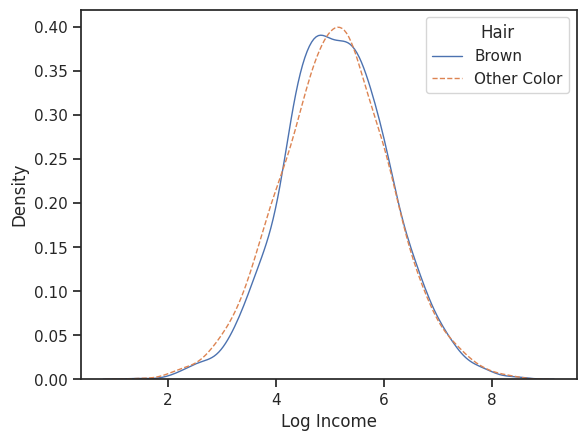

In [8]:
sns.set(style='ticks')

sns.kdeplot(data = student[student['Hair'] == 'Brown'], x='logIncome', linestyle='-', linewidth=1, label='Brown')
sns.kdeplot(data = student[student['Hair'] == 'Other Color'], x='logIncome', linestyle='--', linewidth=1, label='Other Color')

plt.xlabel('Log Income')
plt.ylabel('Density')
plt.legend(title='Hair')

plt.show()

In [9]:
mean_by_hair = student.groupby('Hair')['logIncome'].mean().round(3)
mean_by_hair

,logIncome
Hair,
Brown,5.132
Other Color,5.094


In [10]:
# Calculate difference of log income
diff_logIncome = mean_by_hair["Brown"] - mean_by_hair["Other Color"]

# Interprete their difference in term ratio
ratio_brown_other = np.round(np.exp(diff_logIncome), 2)
ratio_brown_other

np.float64(1.04)

- The ratio of income of brown hair and income of other color is 1.04
- We can say that brown-haired individuals have 4% higher income than those with other hair colors.
- It **contradicts the fact that 10% income boost for brown hair** (See DGP of the data). What happened?


#### Identification

- Indentification is a process recognizing and addressing potential issues in the data.
- Let's limit to the ones who attend college

In [11]:
college_student = student[student['College']]

mean_by_hair_college = college_student.groupby('Hair')['logIncome'].mean().round(3)
mean_by_hair_college

,logIncome
Hair,
Brown,5.330
Other Color,5.201


In [12]:
# Calculate difference of log income
diff_logIncome = mean_by_hair_college["Brown"] - mean_by_hair_college["Other Color"]

# Interprete their difference in term ratio
ratio_brown_other = np.round(np.exp(diff_logIncome), 2)
ratio_brown_other

np.float64(1.14)

- Among college students, the ratio of income of brown hair and income of other color is 1.04
- Among college students, the income of brown-haired individuals is 13% higher than other colored students.
- By considering the DGP, we obtained a closer estimate to the known 10% income boost for brown hair.

### Conclusion

- From the brown hair-income example, we know that DGPs have two parts: known and unknown.
  - The Known: Only non-college people dye their hair and Income related to College Degree
  - The Unknown: The Effect of being brown-haired on Income
- Researchers aim to learn about the unknown parts through research. Researchers use what they know about the DGP to understand and focus on the desired variation in data.
- Identifying the issues or problems within the data that need to be resolved, such as the observation that non-college students dyeing their hair was causing difficulties, is a crucial step in the data analysis process known as identification.

## Avocado
---

### Load Data

In [14]:
avocado = pd.read_csv('conventional_avocado_cailfornia.csv')
avocado

,Date,AveragePrice,Total Volume (Millions)
0,2015-01-04,0.93,5.777335
1,2015-01-11,0.92,6.024932
2,2015-01-18,1.02,5.570915
3,2015-01-25,1.06,4.929884
4,2015-02-01,0.85,9.032181
...,...,...,...
164,2018-02-25,1.03,6.750361
165,2018-03-04,1.13,6.295530
166,2018-03-11,1.11,6.488605
167,2018-03-18,1.02,6.802084


### Visualization

This scatterplot displays the relationship between the price of avocados (x-axis) and the total number of avocados sold (y-axis).

Text(0.5, 1.0, 'Price and Quanitity Sold')

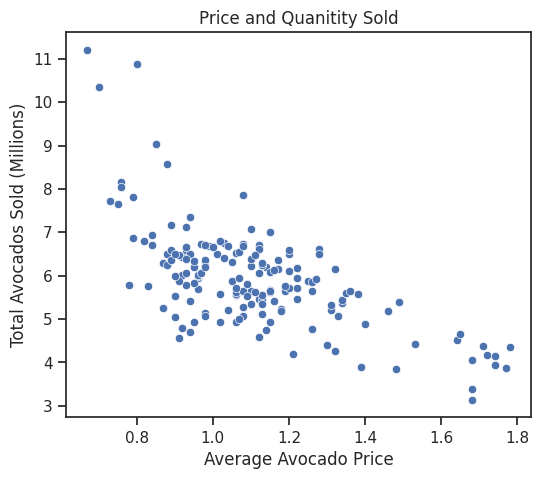

In [15]:
plt.figure(figsize=(6, 5))

sns.scatterplot(data = avocado, x = 'AveragePrice', y = 'Total Volume (Millions)')

plt.xlabel('Average Avocado Price')
plt.ylabel('Total Avocados Sold (Millions)')
plt.title('Price and Quanitity Sold')

- Each point on the graph represents the price and quantity of avocados sold in California during a specific week from January 2015 to March 2018.

### Analysis

Please take some time to carefully analyze the graph. During this process, I'd like you to ponder the following questions:

1.  Based the scatterplot, what conclusion(s) can you draw? Approach this question from an objective perspective, avoiding any assumptions beyond what the data presents.

In [16]:
avocado.iloc[:8]

,Date,AveragePrice,Total Volume (Millions)
0,2015-01-04,0.93,5.777335
1,2015-01-11,0.92,6.024932
2,2015-01-18,1.02,5.570915
3,2015-01-25,1.06,4.929884
4,2015-02-01,0.85,9.032181
5,2015-02-08,0.91,5.871225
6,2015-02-15,0.96,5.699945
7,2015-02-22,0.96,5.951871


In [17]:
# Get data from Januari to February 2015
avocado_slice = avocado.iloc[:8].copy()

# Convert Data column to datetime format
avocado_slice['Date'] = pd.to_datetime(avocado_slice['Date'])

# Create yearmonth column
month = avocado_slice['Date'].dt.strftime('%b')
year = avocado_slice['Date'].dt.year.astype(str)

avocado_slice['yearmonth'] = month + " " + year

# Get the first data of the month
avocado_slice.loc[:,'yearmolabel'] = avocado_slice['Date'].where(avocado_slice.index % 4 == 0)
avocado_slice = avocado_slice[~np.isnat(avocado_slice["yearmolabel"])]
avocado_slice

,Date,AveragePrice,Total Volume (Millions),yearmonth,yearmolabel
0,2015-01-04,0.93,5.777335,Jan 2015,2015-01-04
4,2015-02-01,0.85,9.032181,Feb 2015,2015-02-01


Text(0.5, 1.0, 'Two data points representing consecutive weeks')

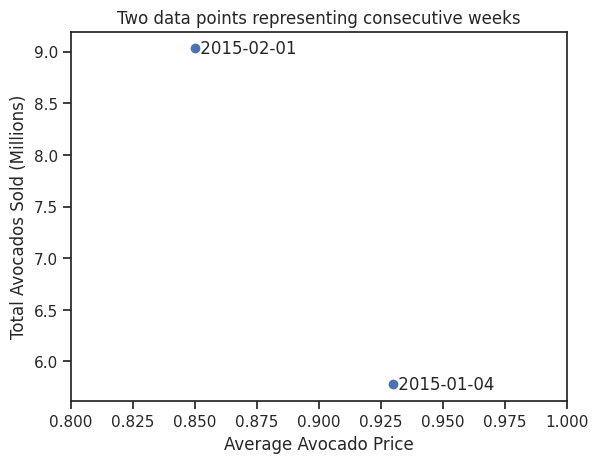

In [18]:
# Create scatterplot
plt.scatter(data = avocado_slice, x = 'AveragePrice', y = 'Total Volume (Millions)')

# Add title in each dot

x_coords = avocado_slice["AveragePrice"]
y_coords = avocado_slice["Total Volume (Millions)"]
xy_name = avocado_slice["Date"].astype(str)

for x, y, z in zip(x_coords, y_coords, xy_name):
    plt.annotate(
        ' %s' % (z),
        xy=(x, y),
        xytext=(0, 0),
        textcoords='offset points',
        va='center')


plt.xlim(0.8, 1)
plt.xlabel('Average Avocado Price')
plt.ylabel('Total Avocados Sold (Millions)')
plt.title('Two data points representing consecutive weeks')

- Despite the reduced complexity in Figure with only two data points, we can still observe a negative relationship, similar to what was observed in previous scatterplot.
- However, it raises questions about the reasons behind the price drop and quantity increase between January and February of that year.
- The fluctuations in variables like price and quantity can be attributed to a combination of various factors. These factors are embedded within the data generating process. The knowledge of the data generating process (DGP) is crucial for effective analysis. Lack of information about the DGP hinders our ability to draw meaningful conclusions.

#### Looking for Variation

- Let's consider a **hypothetical scenario** to gain further insights.

Assume that avocado suppliers **determine prices at the beginning of each month** and **maintain those prices throughout the month**.
- By assuming that seller behavior remains constant within a month, we eliminate variations caused by seller decisions.
- This assumption allows us to focus solely on buyer behavior, as any between-month variation is disregarded.
- Removing between-month variation helps in refining the analysis and digging deeper into buyer behavior.

In [19]:
# Get data from February to March 2015
avocado_slice = avocado.iloc[4:12].copy()

# Convert Data column to datetime format
avocado_slice['Date'] = pd.to_datetime(avocado_slice['Date'])

# Create yearmonth column
month = avocado_slice['Date'].dt.strftime('%b')
year = avocado_slice['Date'].dt.year.astype(str)

avocado_slice['yearmonth'] = month + " " + year

# Get the first data of the month
avocado_slice.loc[:,'yearmolabel'] = avocado_slice['yearmonth'].where(avocado_slice.index % 4 == 0, "")
avocado_slice

,Date,AveragePrice,Total Volume (Millions),yearmonth,yearmolabel
4,2015-02-01,0.85,9.032181,Feb 2015,Feb 2015
5,2015-02-08,0.91,5.871225,Feb 2015,
6,2015-02-15,0.96,5.699945,Feb 2015,
7,2015-02-22,0.96,5.951871,Feb 2015,
8,2015-03-01,0.84,6.700134,Mar 2015,Mar 2015
9,2015-03-08,0.96,5.990244,Mar 2015,
10,2015-03-15,1.06,5.557163,Mar 2015,
11,2015-03-22,1.06,5.571813,Mar 2015,


Text(0, 0.5, 'Total Avocados Sold (Millions)')

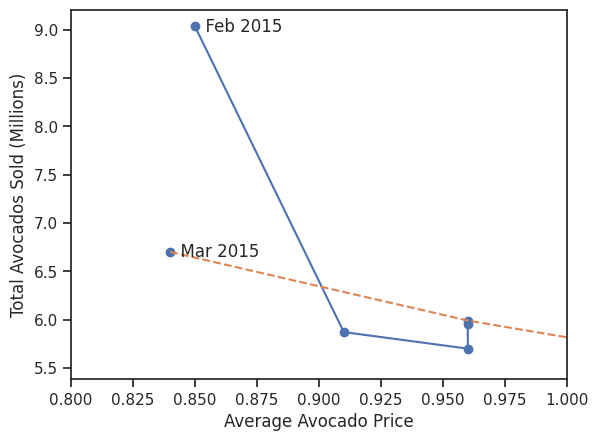

In [20]:
# Create scatterplot
plt.scatter(data = avocado_slice, x = 'AveragePrice', y = 'Total Volume (Millions)')

datafeb = avocado_slice[avocado_slice['yearmonth'] == "Feb 2015"]
datamar = avocado_slice[avocado_slice['yearmonth'] == "Mar 2015"]

# Add lines connecting each dot in same year
plt.plot(datafeb['AveragePrice'], datafeb['Total Volume (Millions)'], linestyle = '-')
plt.plot(datamar['AveragePrice'], datamar['Total Volume (Millions)'], linestyle = '--')

# Add title of dot represent the first data in each month
x_coords = avocado_slice["AveragePrice"]
y_coords = avocado_slice["Total Volume (Millions)"]
xy_name = avocado_slice["yearmolabel"]

for x, y, z in zip(x_coords, y_coords, xy_name):
    plt.annotate(
        '  %s' % (z),
        xy=(x, y),
        xytext=(0, 0),
        textcoords='offset points',
        va='center')

plt.xlim(0.8, 1)
plt.xlabel('Average Avocado Price')
plt.ylabel('Total Avocados Sold (Millions)')

- Analyzing changes within months, as shown in the scatterplot, reveals a consistent negative relationship between price and quantity.
- Regardless of the differences between months, each individual month demonstrates a negative relationship.
- Based on the data and our understanding of seller behavior, we can conclude that an increase in price likely reduces the quantity of avocados people desire to buy.

### Conclusion

- Answering our research question requires identifying the relevant variation.
- Raw data may not directly address the question of interest, necessitating the search for the underlying variation.
- It is essential to determine where the relevant variation resides and how to extract it.
- The process of isolating the variation of interest and ensuring it aligns with the research question is known as identification.

# IP Spend on Profit
---
- In this section we will demonstrate the usage of graphical model, causal diagram to help us identify causal effect
- Suppose we have the company data that generated from some process.

### Load Data

In [21]:
company = pd.read_csv("company.csv")
company

,tech,IP_spend,profit
0,0,1.241523,1.525846
1,1,4.492139,2.671638
2,0,2.099882,3.219627
3,0,3.002380,0.885119
4,0,1.334030,1.100774
...,...,...,...
495,0,0.390705,0.477228
496,0,2.059689,1.032311
497,0,3.753648,2.897378
498,0,0.914586,2.231011


In [22]:
company.corr()

,tech,IP_spend,profit
tech,1.000000,0.761438,0.45446
IP_spend,0.761438,1.000000,0.14855
profit,0.454460,0.148550,1.00000


In [23]:
company.corr()

,tech,IP_spend,profit
tech,1.000000,0.761438,0.45446
IP_spend,0.761438,1.000000,0.14855
profit,0.454460,0.148550,1.00000


<Axes: xlabel='tech', ylabel='IP_spend'>

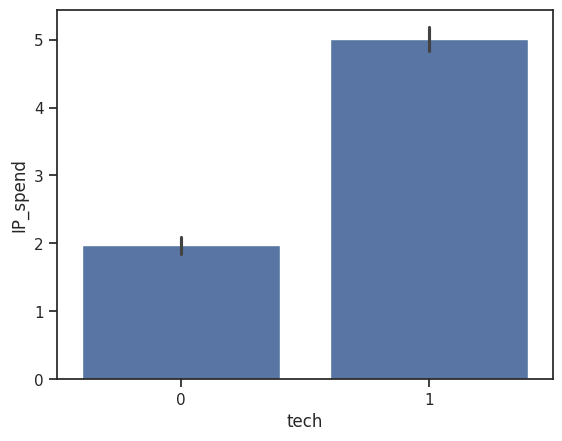

In [24]:
sns.barplot(x = "tech", y= "IP_spend", data = company)

<Axes: xlabel='tech', ylabel='profit'>

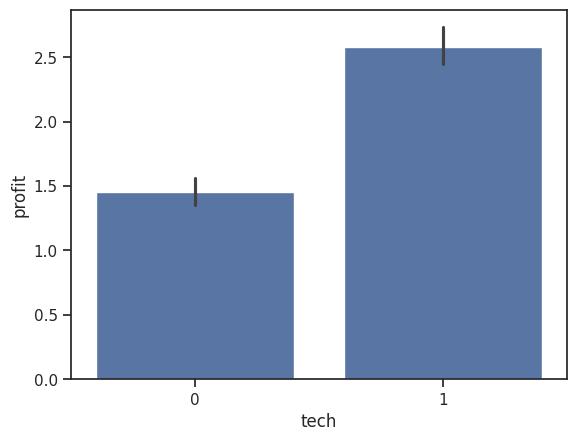

In [25]:
sns.barplot(x = "tech", y= "profit", data = company)

3. We know that tech company have higher profit than non tech.

Based on this understanding,
- A portion of the correlation between profit and IP_spend is attributed to the impact of being a technology company.
- Consequently, if we eliminate that influence, the remaining correlation should represent the actual negative effect of IP lawsuits.

While we can arrive at this intuition, having a more formal model called **causal diagram** would be highly valuable as it would provide guidance for various scenarios.

### Causal Diagram

### 1. List All Variables

- IP Spend
- Profit
- Tech

### 2. Draw Arrows to Define Their Relationship

Then, write down what we think causes what!
#### 2.1 List Arrows
- Being a tech company leads you to have to spend more money on IP lawsuits, **Tech &rarr; IPSpend**
- Being a tech company leads you to have higher profits, **Tech &rarr; Profit**
- IP lawsuits spending lower your profits, **IPspend &rarr; Profit**

#### 2.2 Draw Diagram

- Causal Diagram can be manually created or alternatively, computer tools such as dagitty.net can assist in drawing them.
- We provide python code examples for drawing the graphs using `causalgraphicalmodels` library.

In [32]:
# Install library dulu (kalau belum)
!pip install causalgraphicalmodels graphviz

# Patch bug 'Iterable' biar kompatibel dengan Python 3.10+
!sed -i 's/from collections import Iterable/from collections.abc import Iterable/' /usr/local/lib/python3.*/dist-packages/causalgraphicalmodels/cgm.py

# Baru import
from causalgraphicalmodels import CausalGraphicalModel

- Create a variable as CausalGraphicalModel object
- Write down list of all related variables in `nodes`
- Write down list of arrow direction in edges
  - You can add two variable in tuple in edges list
  - Inserting `("IPspend", "profit")` means you want to draw arrow from IPspend to profit (**IPspend &rarr; profit**)
  - You can only list two variables, if you want to draw **A &rarr; B &rarr; C**, then add `("A", "B")` and `("B", "C")` to the edge list

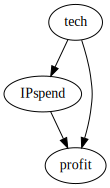

In [33]:
# Create causal diagram
ipspend_diagram = CausalGraphicalModel(nodes=["IPspend", "profit", "tech"],
                                       edges=[("IPspend", "profit"),
                                              ("tech", "IPspend"),
                                              ("tech", "profit")])

# Draw return a graphviz object
ipspend_diagram.draw()

### 3. Simplifying Diagram

- From the diagram before, we have no irrelevant, unimportant, redundant or mediator variable
- So we don't need to remove some nodes or arrows

### 4. Identification of Variation

Next, let's write down the assumption we have before in causal diagram:

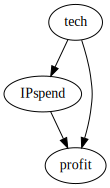

In [34]:
ipspend_diagram.draw()

### 5. Controlling

- The process of isolate the variation we want  is called “adjusting” or “controlling”.
- We are “controlling for tech to be constant and therefore taking out the part of the relationship that is explained by it

#### Option 1

- Use tech to predict/explain IPspend, and take the residual
- Use tech to predict/explain profit, and take the residual
- The relationship between the first residual and the second residual is very likely to be causal!

You can use any mathematical form of relationship to explain or predict variables, here we give an example using mean in 1.1 section, next we demonstrate it using regression in 1.2

##### 1.1 Using Mean

In [35]:
# Create a copy of company DataFrame
company_new = company.copy()

In [36]:
# Create object of data group by 'tech'
company_grouped = company_new.groupby('tech')

# Create new column that represent average IPspend depend on the tech
company_new['mean_IP_spend_bytech'] = company_grouped['IP_spend'].transform('mean')
company_new.head()

,tech,IP_spend,profit,mean_IP_spend_bytech
0,0,1.241523,1.525846,1.972128
1,1,4.492139,2.671638,5.003749
2,0,2.099882,3.219627,1.972128
3,0,3.002380,0.885119,1.972128
4,0,1.334030,1.100774,1.972128


In [37]:
# Calculate residuals
company_new['residual_IP_spend'] = company_new['IP_spend'] - company_new['mean_IP_spend_bytech']

company_new.head()

,tech,IP_spend,profit,mean_IP_spend_bytech,residual_IP_spend
0,0,1.241523,1.525846,1.972128,-0.730605
1,1,4.492139,2.671638,5.003749,-0.511609
2,0,2.099882,3.219627,1.972128,0.127754
3,0,3.002380,0.885119,1.972128,1.030252
4,0,1.334030,1.100774,1.972128,-0.638098


In [38]:
# Create new column that represent average profit depend on the tech
company_new['mean_profit_bytech'] = company_grouped['profit'].transform('mean')
company_new

,tech,IP_spend,profit,mean_IP_spend_bytech,residual_IP_spend,mean_profit_bytech
0,0,1.241523,1.525846,1.972128,-0.730605,1.451697
1,1,4.492139,2.671638,5.003749,-0.511609,2.583240
2,0,2.099882,3.219627,1.972128,0.127754,1.451697
3,0,3.002380,0.885119,1.972128,1.030252,1.451697
4,0,1.334030,1.100774,1.972128,-0.638098,1.451697
...,...,...,...,...,...,...
495,0,0.390705,0.477228,1.972128,-1.581422,1.451697
496,0,2.059689,1.032311,1.972128,0.087561,1.451697
497,0,3.753648,2.897378,1.972128,1.781520,1.451697
498,0,0.914586,2.231011,1.972128,-1.057542,1.451697


In [39]:
# Calculate residuals
company_new['residual_profit'] = company_new['profit'] - company_new['mean_profit_bytech']
company_new.head()

,tech,IP_spend,profit,mean_IP_spend_bytech,residual_IP_spend,mean_profit_bytech,residual_profit
0,0,1.241523,1.525846,1.972128,-0.730605,1.451697,0.074149
1,1,4.492139,2.671638,5.003749,-0.511609,2.583240,0.088398
2,0,2.099882,3.219627,1.972128,0.127754,1.451697,1.767930
3,0,3.002380,0.885119,1.972128,1.030252,1.451697,-0.566577
4,0,1.334030,1.100774,1.972128,-0.638098,1.451697,-0.350922


In [40]:
company_new[["residual_profit","residual_IP_spend"]].corr()

,residual_profit,residual_IP_spend
residual_profit,1.000000,-0.342022
residual_IP_spend,-0.342022,1.000000


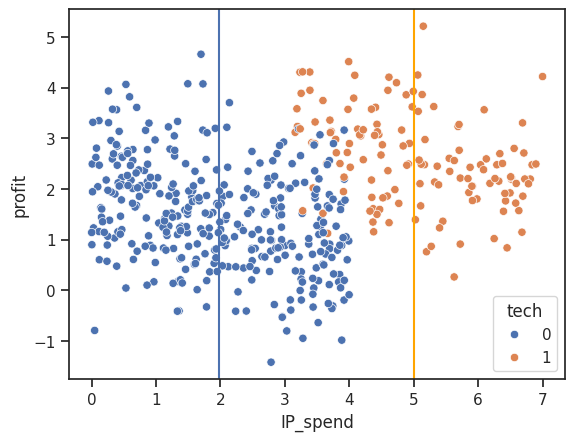

In [41]:
graph = sns.scatterplot(x = "IP_spend", y= "profit", data = company_new, hue = "tech")

graph.axvline(company_new["mean_IP_spend_bytech"].unique()[0])
graph.axvline(company_new["mean_IP_spend_bytech"].unique()[1], color = "orange")

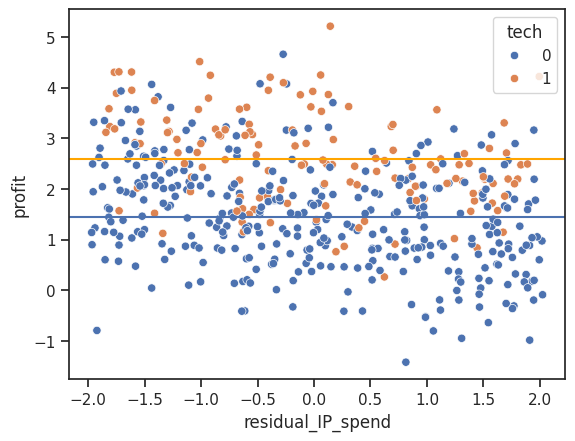

In [42]:
graph = sns.scatterplot(x = "residual_IP_spend", y= "profit", data = company_new, hue = "tech")
graph.axhline(company_new["mean_profit_bytech"].unique()[0])
graph.axhline(company_new["mean_profit_bytech"].unique()[1], color = "orange")

<Axes: xlabel='residual_IP_spend', ylabel='residual_profit'>

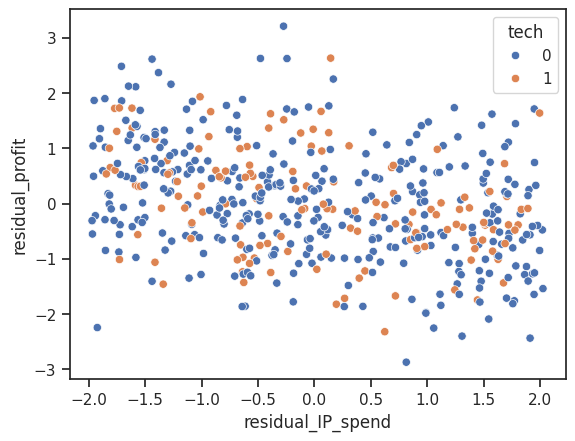

In [43]:
sns.scatterplot(x = "residual_IP_spend", y= "residual_profit", data = company_new, hue = "tech")

In [44]:
# Calculate correlation
correlation = company_new['residual_profit'].corr(company_new['residual_IP_spend'])
print(correlation)

-0.34202248318985295


In [45]:
# Create a copy of company DataFrame
company_reg = company.copy()

# Fit linear regression models
IPspend_model = sm.ols('IP_spend ~ tech', data = company_reg)
IPspend_model_sum = IPspend_model.fit()

# Take the residual
company_reg["residual_IP_spend"] = IPspend_model_sum.resid
company_reg.head()

,tech,IP_spend,profit,residual_IP_spend
0,0,1.241523,1.525846,-0.730605
1,1,4.492139,2.671638,-0.511609
2,0,2.099882,3.219627,0.127754
3,0,3.002380,0.885119,1.030252
4,0,1.334030,1.100774,-0.638098


<Axes: xlabel='residual_IP_spend', ylabel='profit'>

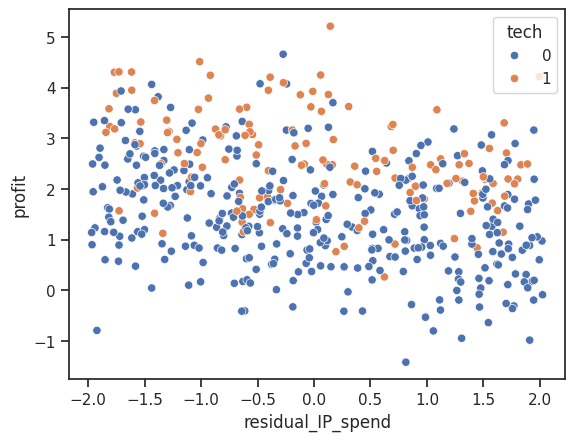

In [46]:
sns.scatterplot(x = "residual_IP_spend", y= "profit", data = company_reg, hue= "tech")

In [47]:
# Fit linear regression models
profit_model = sm.ols('profit ~ tech', data = company_reg)
profit_model_sum = profit_model.fit()

# Take the residual
company_reg["residual_profit"] = profit_model_sum.resid
company_reg.head()

,tech,IP_spend,profit,residual_IP_spend,residual_profit
0,0,1.241523,1.525846,-0.730605,0.074149
1,1,4.492139,2.671638,-0.511609,0.088398
2,0,2.099882,3.219627,0.127754,1.767930
3,0,3.002380,0.885119,1.030252,-0.566577
4,0,1.334030,1.100774,-0.638098,-0.350922


<Axes: xlabel='residual_IP_spend', ylabel='residual_profit'>

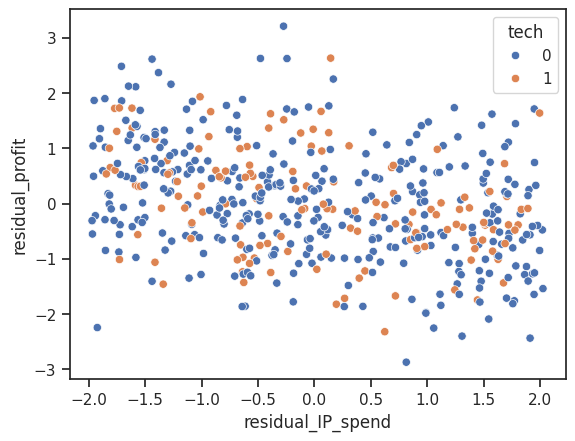

In [48]:
sns.scatterplot(x = "residual_IP_spend", y= "residual_profit", data = company_reg, hue= "tech")

In [49]:
# Fit linear regression models
ipspend_profit_model = sm.ols('residual_profit ~ residual_IP_spend', data = company_reg)
ipspend_profit_model_sum = ipspend_profit_model.fit()

# Show the summary of model
ipspend_profit_model_sum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        residual_profit   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     65.97
Date:                Fri, 18 Jul 2025   Prob (F-statistic):           3.63e-15
Time:                        22:28:14   Log-Likelihood:                -676.28
No. Observations:                 500   AIC:                             1357.
Df Residuals:                     498   BIC:                             1365.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5.655e-16      0.042  -1.35e-14      1.000      -0.082       0.082
residual_IP_spend    -0.2939      0.036     -8.122      0.000      -0.365      -0.223
==============================================================================
Omnibus:                        2.483   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.289   Jarque-Bera (JB):                2.340
Skew:                           0.165   Prob(JB):                        0.310
Kurtosis:                       3.057   Cond. No.                         1.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Fit linear regression models, add tech as predictor
model = sm.ols('profit ~ IP_spend + tech', data = company).fit()

# Show the summary of model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     106.2
Date:                Fri, 18 Jul 2025   Prob (F-statistic):           4.04e-39
Time:                        22:28:16   Log-Likelihood:                -676.28
No. Observations:                 500   AIC:                             1359.
Df Residuals:                     497   BIC:                             1371.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0313      0.087     23.378      0.000       1.861       2.202
IP_spend      -0.2939      0.036     -8.114      0.000      -0.365      -0.223
tech           2.0226      0.144     14.025      0.000       1.739       2.306
==============================================================================
Omnibus:                        2.483   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.289   Jarque-Bera (JB):                2.340
Skew:                           0.165   Prob(JB):                        0.310
Kurtosis:                       3.057   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- After tech as “control” variables, it reveals negative relationship shown by the negative coefficient, -0.29
- We got rid of the part of the IP_spend or profit relationship that was explained by tech by controlling for tech (“holding it constant”)
- By doing so, we are examining the association between IP.spend and profit by specifically comparing firms that have the same level of tech.
- This type of comparison, often referred to as an "apples to apples" comparison. It allows us to obtain results that are closer to those obtained from randomized experiment.

### Conclusion
- We managed to identify the **IP_spend→profit arrow**, the causal effect we’re interested in
- We correctly found that it was negative, after applying appropriate methods that block the role of tech variable.
  *Remember, we made it truly negative in the data generating process.
- It was the diagram that guide us to control for tech*
- Diagrams can tell us how to identify things in much more complex circumstances.
- It was pretty obvious what to do to estimate the causal effect we want just by looking at the graph

# Online Class
---


- Writing the world down in a graph may seem challenging, considering the world's complexity, but we can navigate this challenge by focusing and prioritizing our research question.
- Let's explore a study to illustrate our thought process when determining the structure of the data generating process.
- This study were interested in **the effect of taking online courses on staying in college**, specifically in community college in Washington State.
- The example study providing insights into the considerations we made when defining the data generating process. It serves as a practical demonstration of how to translate complex concepts into a graphical representation.

### 1. List All Variables

Two crucial variables for our study:
- The treatment variable, which is the enrollment in **online classes**, and
- The outcome variable, which is the occurrence of **dropout** since taking the class.

So now we have two variable related to our research question:
1. Online Class
2. Dropout

In order to capture the data generating process accurately, we must include all variables that contribute to the observation of online class-taking, dropout, or their relationship. Variables that directly cause the treatment or outcome, as well as those that affect intermediary factors leading to the treatment or outcome.
- Online Class.
  - Various factors can influence individuals' decision to take online classes, such as their **preferences** for or against online courses, which can be shaped by background factors like **race**, **gender**, **age**, and **socioeconomic status** (SES).
  - Additionally, these background factors may also impact the amount of **available time** a student has, with time-pressed students potentially preferring online courses.
  - The availability of time can, in turn, be influenced by the number of **work hours** a student undertakes. Furthermore, solid **internet access** is a prerequisite for taking online courses.
- Dropout
  - When considering the factors that may contribute to college dropout, some of the same background factors mentioned earlier, including **race**, **gender**, **SES**, and **work hours**, may also be relevant.
  - Additionally, a student's previous **academic performance** is likely to play a role in their decision to drop out of community college.

So, the list we will have is:
- Preferences
- Race
- Gender
- Age
- SES
- AvailableTime
- WorkHours
- InternetAccess
- Academics

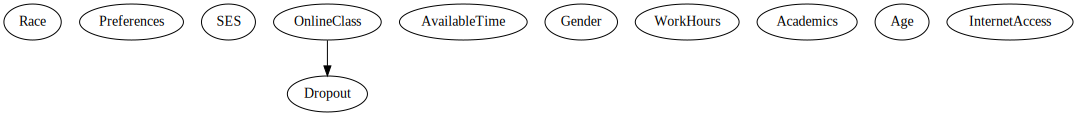

In [51]:
# Create causal diagram
onlineclass = CausalGraphicalModel(nodes = ["OnlineClass","Dropout","Preferences", "Race", "Gender", "Age",
                                          "SES", "AvailableTime","WorkHours", "InternetAccess", "Academics"],
                                   edges = [("OnlineClass","Dropout")])

# Draw return a graphviz object
onlineclass.draw()

- Take a moment to reflect and carefully consider if there are any crucial elements that we may have overlooked.
- You might be able to identify a few additional factors of importance. However, for the time being, let's conclude our list with the variables we have already discussed.

The example of unimportant variables we do not include
- The availability of `QuietCafes` in an individual's neighborhood could serve as an incentive for them to enroll in online courses, providing a peaceful environment for studying.
- While this factor may influence a few students, it is unlikely to significantly impact the decision-making process for the majority of students.
- Therefore, it is reasonable to omit QuietCafes from our analysis, as we assume its overall effect is expected to be minimal.

### 2. Draw Arrows to Define Their Relationship

- Now, add other relation of each variables to each other by drawing an arrow
- We have identified several variables that contribute to both the treatment and outcome variables based on our previous descriptions of the variables.
    - OnlineClass causes Dropout
    - Preferences: causes OnlineClass
    - Race: causes Dropout
    - Gender: causes Dropout
    - Age: causes Dropout
    - SES: causes Dropout
    - AvailableTime: causes OnlineClass, Dropout
    - InternetAccess: causes OnlineClass
    - Academics: causes Dropout
- Add other the edges list to represent other arrows

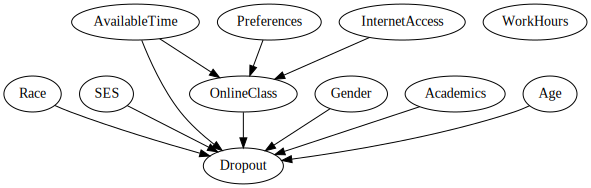

In [52]:
# Create causal diagram
onlineclass = CausalGraphicalModel(
    nodes = ["OnlineClass","Dropout","Preferences", "Race", "Gender", "Age", "SES", "AvailableTime",
           "WorkHours", "InternetAccess", "Academics"],
    edges = [
        ("OnlineClass", "Dropout"),
        ("Preferences", "OnlineClass"),
        ("Age", "Dropout"),
        ("Race", "Dropout"),
        ("Gender", "Dropout"),
        ("SES", "Dropout"),
        ("AvailableTime", "Dropout"),
        ("AvailableTime", "OnlineClass"),
        ("InternetAccess", "OnlineClass"),
        ("Academics", "Dropout"),
    ]
)

# Draw return a graphviz object
onlineclass.draw()

How about which non-treatment and non-control variables cause each other?
- e.g `Age` has a causal influence on socio-economic status (SES), and all the background variables (Race, Gender, Age, SES) have an impact on AvailableTime and WorkHours. SES is likely to have a causal effect on InternetAccess.
- Additionally, when considering variables that are related to each other without a clear causal direction, we introduce common causes (unobserved variable, U1, U2, etc. will be represent latent edges) that influence both variables.
- For example, Academics and SES are correlated with Race and Gender, and Academics may also be linked to employment types, impacting WorkHours.
- Furthermore, InternetAccess is likely influenced not only by SES but also by Location, which we haven't included so far. Hence, Location may need to be added to the list of relevant variables.
    
So what we have now:
- OnlineClass: causes dropout
- Preferences: causes OnlineClass
- Race: causes Preferences, Dropout, AvailableTime, WorkHours, related to Academics, SES
- Gender: causes Preferences, Dropout, AvailableTime, WorkHours, related to Academics, SES
- Age: causes Preferences, Dropout, SES, AvailableTime, WorkHours
- SES: causes Preferences, Dropout, InternetAccess, AvailableTime, WorkHours
- AvailableTime: causes OnlineClass, Dropout
- WorkHours: causes AvailableTime
- InternetAccess: causes OnlineClass
- Academics: causes Dropout, WorkHours, related to Race, Gender
- Location: causes InternetAccess, related to SES

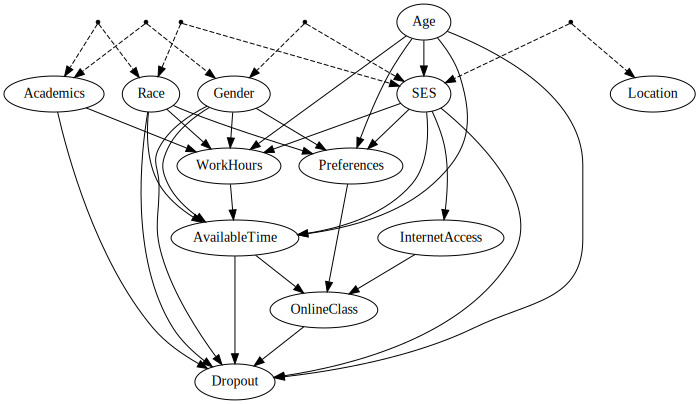

In [53]:
# Create causal diagram
onlineclass = CausalGraphicalModel(
    nodes = ["OnlineClass","Dropout","Preferences", "Race", "Gender", "Age", "SES", "AvailableTime",
           "WorkHours", "InternetAccess", "Academics"],
    edges = [
        ("OnlineClass", "Dropout"),
        ("Preferences", "OnlineClass"),
        ("Race", "Preferences"),
        ("Race", "Dropout"),
        ("Race", "AvailableTime"),
        ("Race", "WorkHours"),
        ("Gender", "Preferences"),
        ("Gender", "Dropout"),
        ("Gender", "AvailableTime"),
        ("Gender", "WorkHours"),
        ("Age", "Preferences"),
        ("Age", "Dropout"),
        ("Age", "SES"),
        ("Age", "AvailableTime"),
        ("Age", "WorkHours"),
        ("SES", "Preferences"),
        ("SES", "Dropout"),
        ("SES", "InternetAccess"),
        ("SES", "AvailableTime"),
        ("SES", "WorkHours"),
        ("AvailableTime", "Dropout"),
        ("AvailableTime", "OnlineClass"),
        ("WorkHours", "AvailableTime"),
        ("Academics", "Dropout"),
        ("Academics", "WorkHours"),
        ("InternetAccess", "OnlineClass"),
        ("Location", "InternetAccess")],
    latent_edges = [
        ("Race", "SES"),
        ("Race", "Academics"),
        ("Gender", "Academics"),
        ("Gender", "SES"),
        ("Location", "SES")]
)

# Draw return a graphviz object
onlineclass.draw()

### 3. Simplifying Diagram

1. **Unimportance**. We’ve already done Unimportance and left a few variables off for that reason. (Remember we don't add QuieteCafe in the diagram)
2. **Redudancy**.We do have some variables that occupy the same space on the diagram and so might be redundant. In particular, `Gender` and `Race` have the exact same set of arrows coming in and going out. So we can combine those in to one, which we can call Demographics.
3. **Mediators**. We have a few here,
   - `Preferences`. Instead of having multiple variables (Gender, Race, SES, and Age) affecting Preferences and then influencing OnlineClass, the model suggests a direct link between these four variables and OnlineClass, simplifying the causal relationships.
   - `InternetAccess`. The pathway through Location → InternetAccess → OnlineClass can be eliminated, as removing InternetAccess from the model does not result in any loss of information.
   - While WorkHours affect OnlineClass through AvailableTime, they cannot be categorized solely as redundant or mediators. Other variables also influence AvailableTime but do not directly affect WorkHours.
   - `AvailableTime`. The suggestion is to eliminate AvailableTime and have WorkHours directly affect OnlineClass (mediators). The variables that cause AvailableTime would still influence WorkHours, maintaining the relevant information (redundancy).
   - Although Academics does not directly cause AvailableTime, it influences it through WorkHours. This simplification may lead to a minor loss of information, but careful consideration is required to assess its impact.

So, we will drop these variables:
- Gender
- Race
- Preferencess
- InternetAccess
- AvailableTime

And add `Demographics` variable

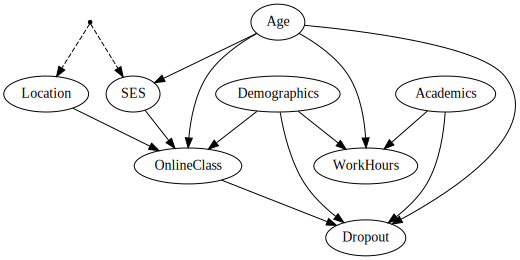

In [54]:
onlineclass = CausalGraphicalModel(
    nodes = ["OnlineClass","Dropout", "Demographics", "Age", "SES","WorkHours", "Location", "Academics"],
    edges = [
        ("OnlineClass", "Dropout"),
        ("Demographics", "OnlineClass"),
        ("Demographics", "WorkHours"),
        ("Demographics", "Dropout"),
        ("U3", "Academics"),
        ("U3", "Demographics"),
        ("U4", "SES"),
        ("U4", "Demographics"),
        ("Age", "SES"),
        ("Age", "Dropout"),
        ("Age", "WorkHours"),
        ("Age", "OnlineClass"),
        ("SES", "OnlineClass"),
        ("Academics", "Dropout"),
        ("Academics", "WorkHours"),
        ("Location", "OnlineClass"),
        ("U5", "Location"),
        ("U5", "SES")],
    latent_edges = [
        ("Location", "SES")]
)

# draw return a graphviz `dot` object, which jupyter can render
onlineclass.draw()

- While the steps for variable simplification can be valuable, it's essential to approach them with caution and not apply them blindly.
- The use of "probably" in each step emphasizes the need for thoughtful evaluation before removing any variable from the analysis.
- In a previous instance, we eliminated InternetAccess due to its role as a mediator. In the original study, InternetAccess was significant as an "instrument" because it caused OnlineClass. If we had simplified by removing InternetAccess in that study, we would have lost the core of our research, rendering the study practically impossible.

### Conclusion
- The steps for variable simplification are valuable tools, but their application requires careful consideration.
- Crucial variables for research design or communication should be retained, even if they appear as mediators or fulfill the criteria for removal.
- A well-informed, thoughtful approach to variable simplification will ensure the accuracy and relevance of our study findings.

# Police per Capita
---
    
- Let's examine a causal diagram aimed at tackling a well-known question in causal inference within the social sciences: **what is the impact of police presence on crime?**

### Relevant Data

In [57]:
crime = pd.read_csv('crime_data.csv')
crime

,county,year,polpc,crmrte
0,1,81,0.001787,0.039885
1,1,82,0.001767,0.038345
2,1,83,0.001836,0.030305
3,1,84,0.001886,0.034726
4,1,85,0.001924,0.036573
...,...,...,...,...
625,197,83,0.001073,0.015575
626,197,84,0.001109,0.013662
627,197,85,0.001054,0.013086
628,197,86,0.001088,0.012874


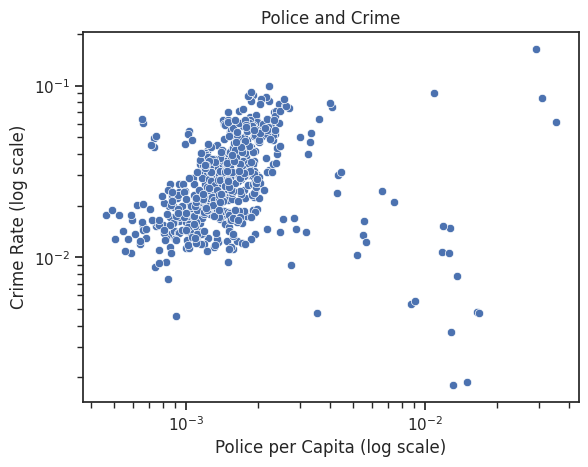

In [58]:
sns.scatterplot(x='polpc', y='crmrte', data = crime)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Police per Capita (log scale)')
plt.ylabel('Crime Rate (log scale)')
plt.title('Police and Crime')

plt.show()

### Causal Diagram

- To unravel this puzzle, let's consider a causal diagram that depicts the process of generating this data.
- A crucial aspect to consider is that crime in previous years (referred to as "lagged crime") is likely to be a causal factor in the current level of police presence. Therefore, the observed correlation is capturing the fact that areas with high crime rates tend to have a larger police presence assigned to them.

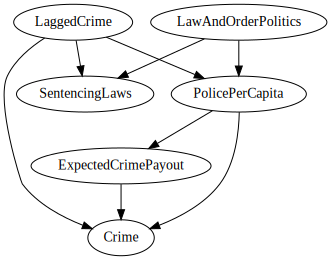

In [59]:
# Create causal diagram
crime = CausalGraphicalModel(
    nodes = ["LaggedCrime","PolicePerCapita","Crime", "ExpectedCrimePayout", "SentencingLaws","LawAndOrderPolitics"],
    edges = [
        ("PolicePerCapita", "Crime"),
        ("PolicePerCapita", "ExpectedCrimePayout"),
        ("LaggedCrime", "SentencingLaws"),
        ("LaggedCrime", "PolicePerCapita"),
        ("LaggedCrime", "Crime"),
        ("ExpectedCrimePayout", "Crime"),
        ("SentencingLaws", "ExpectedCrimePayoaut"),
        ("LawAndOrderPolitics", "SentencingLaws"),
        ("LawAndOrderPolitics", "PolicePerCapita")
    ]
)

# Draw return a graphviz `dot` object
crime.draw()

- One of these factors is the unobservable `ExpectedCrimePayout`, which represents the expected profitability of a crime before it is committed. This expected payout is influenced by the number of police officers present (increasing the chances of getting caught) and the sentencing laws in the area (resulting in longer jail terms if caught).
- Both the `sentencing laws` and `police per capita` are determined by `LawAndOrderPolitics`, an unmeasurable variable indicating the local area's inclination towards tough crime policies.

#### Assumptions behind exclusions
- Each variable not included in the diagram is assumed to be unimportant in the data generating process.
- No direct causal relationships: The absence of arrows between certain variables signifies the assumption that there is no direct causal relationship between them.

In the context of our police and crime graph, these assumptions imply the following:

1. LaggedCrime does not have a causal influence on LawAndOrderPolitics. This means that the level of crime in previous years is not assumed to directly impact the political stance on law and order policies.

2. PovertyRate is not considered as a significant factor in the data generating process. It is assumed that the poverty rate does not play a direct causal role in determining the relationship between police presence and crime rates.

3. LaggedPolicePerCapita does not cause changes in PolicePerCapita or any other variables. This assumption suggests that the past levels of police per capita do not have a direct influence on the current levels of police per capita or any other variables in the system.

4. The occurrence of a RecentPopularCrimeMovie does not cause changes in the crime rate. This assumption indicates that the release or popularity of a recent crime-related movie is not assumed to have a direct impact on the occurrence or level of crime.

These assumptions help describe the scope and relationships considered in the analysis, allowing us to focus on the variables and causal pathways explicitly included in the diagram.

### Utilizing Causal Diagrams for Identifying Answers

- Causal diagrams enable us to determine how to identify the answer to our research question. The diagram helps distinguish the parts of data variation that are relevant for identification from those that are not.
- Utilizing the police-and-crime figure as an example, assuming its correctness, we can explore how to answer the question "Does additional police presence reduce crime?"
  - **PolicePerCapita &rarr; Crime** is the direct effect,
  - while **PolicePerCapita &rarr; ExpectedCrimePayout &rarr; Crime** represents an indirect effect.
- Research question scope: Determine if the research question encompasses only the direct effect or includes indirect effects.

### Isolating Relevant Variation

- To identify the answer, we need to isolate the variation associated with
  - PolicePerCapita causing Crime
  - PolicePerCapita causing ExpectedCrimePayout, which then influences Crime.
- It is necessary to eliminate alternative explanations that can confound the identified causal pathways.
- Identified alternative explanations on the graph:
  - LaggedCrime may cause both PolicePerCapita and Crime, resulting in a correlation between the two due to LaggedCrime's influence.
  - LawAndOrderPolitics can affect both PolicePerCapita and indirectly impact Crime.
- Assuming the validity of the causal diagram, the subsequent steps become clear to identify the answer.
- To isolate the desired variation, **the variation attributed to LaggedCrime and LawAndOrderPolitics needs to be eliminated.**
- Detailed approach: Further guidance on how to accomplish this will be discussed in next sesion.

### Conclusion

- Causal diagrams assist in understanding how to identify the answer to the research question.
- By focusing on the relevant causal paths and blocking alternative explanations, we can isolate the variation required for identification.
- The causal diagram provides clarity on the subsequent steps, such as removing unwanted variation, leading us closer to answering the research question accurately.

### Reference

- The Effect Chapter 5 by Nick Huntington-Klein.